# Data Analytics Spring 2023 &mdash; Exercises 4

### Onni Roivas (last modified: Mon Feb 20 at 13:40)

- Five problems + round 3 peer review
- Round 3 peer review deadline: **Mon Mar 6 at 14:00**
- Problems deadline: **Mon Mar 13 at 14:00**
- Theme: linear regression
- Minor variations between users
- **Make a copy of the original notebook** (right click & duplicate) and add your answers (new cells) there
- Remember: **no autosave** (so keep hitting that ctrl-s / cmd-s button)
- Also: **quit working by stopping the server at https://jupyter.vle.fi/home**
- Please make both your code and your notebook readable
- When you are done, run the handin code cell at the end of this notebook
- The original notebook may change after publication, but the
  changes should be minor
- Keep your originals up to date by running the code cell below:

In [ ]:
import os
os.system('/usr/bin/bash /home/varpha/data_analytics/bin/config.sh');

## Round 3 peer review

**Deadline: Mon Mar 6 at 14:00**. Nothing new here!

In case you handed in your round 03 exercises, your folder **private/exrc_03/peer_review** should contain an anonymous round 03 solutions notebook of another student. In addition, some model solutions for round 03 are to be found in the folder **public/model_solutions**.

Write a few paragraphs of text (plain or markdown) into your favourite text editor and submit by running the code cell below. Please address the following issues:
 
- Are the solutions okay? Can you understand / run the code?<br/>
- What do you think about the solutions?
- How many points out of 5 do they deserve as a whole?
- How many points would you give to yourself and why?
- Any feedback or comments to Harri?

Harri will read and grade your reviews as follows:
- nonexistent or nearly so = 0p
- something written = 1-2p
- well written 3p.

When done with writing your review, please run the code cell below. It asks you to copy-paste your review text to a field that will become visible once you run the cell.


In [ ]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import submit_peer_review
submit_peer_review()

You may double check your review submission by running the following in the terminal (copy-paste & press enter):

> **cat /home/varpha/data_analytics/private/AB0410/exrc_03/peer_review/review_by_AB0410.txt**

In [30]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

## Problem 1. Basic

a) Write a function *least_square_fit* that takes two one-dimensional arrays x and y as parameters. The function should return a tuple (slope, intercept) of the fitted line. Write a main program that tests the *least_square_fit* function with some example arrays, and for each pair of arrays outputs the (slope, intercept) tuple.

b) Modify your main function to plot a scatter plot of the data points along with the fitted line. Also display the values of the slope and intercept from part a) in the figure.

In [31]:
# Create the function
def least_square_fit(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    return slope, intercept # Return values of slope and intercept

# Create arrays
x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([2, 3, 4, 5, 6])
x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([6, 5, 4, 3, 2])

print("A")
print("Slope and intercept of x1 and y1", least_square_fit(x1, y1))
print("Slope and intercept of x2 and y2", least_square_fit(x2, y2))

A
Slope and intercept of x1 and y1 (1.0, 0.999999999999999)
Slope and intercept of x2 and y2 (-0.9999999999999999, 6.999999999999999)


B


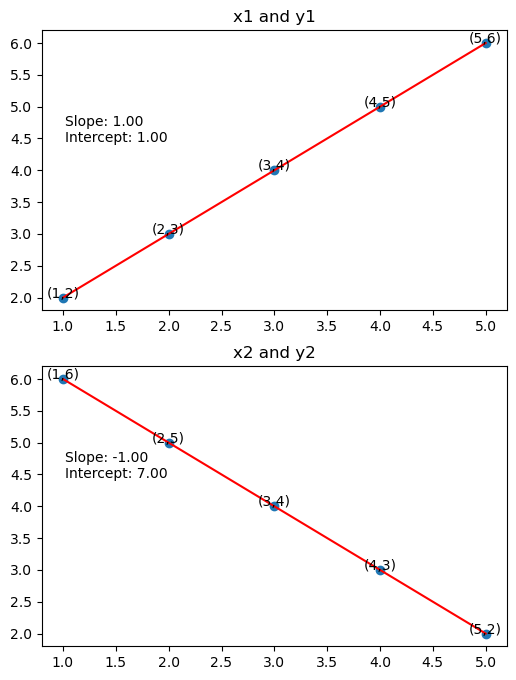

In [32]:
print("B")
def least_square_fit(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    return slope, intercept

x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([2, 3, 4, 5, 6])
x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([6, 5, 4, 3, 2])

# Least square fit for the axes
slope1, intercept1 = least_square_fit(x1, y1)
slope2, intercept2 = least_square_fit(x2, y2)

# Scatter plot with fitted line, slope and intercept values
fig, ax = plt.subplots(2, 1, figsize=(6, 8))


### fig 1
# Plot x1 and y1
ax[0].scatter(x1, y1)
ax[0].plot(x1, slope1*x1 + intercept1, color='r')

# Show values on the line
for i, (xi, yi) in enumerate(zip(x1, y1)):
    ax[0].text(xi, yi, "({},{})".format(xi, yi), ha="center")

# Show text with slope and intercept info
ax[0].text(0.05, 0.60, "Slope: {:.2f}\nIntercept: {:.2f}".format(slope1, intercept1),
        transform=ax[0].transAxes)
ax[0].set_title("x1 and y1") # Set a title

### fig 2
# Plot x2 and y2
ax[1].scatter(x2, y2)
ax[1].plot(x2, slope2*x2 + intercept2, color='r')

# Show values on the line
for i, (xi, yi) in enumerate(zip(x2, y2)):
    ax[1].text(xi, yi, "({},{})".format(xi, yi), ha="center")

# Show text with slope and intercept info
ax[1].text(0.05, 0.60, "Slope: {:.2f}\nIntercept: {:.2f}".format(slope2, intercept2),
        transform=ax[1].transAxes)
ax[1].set_title("x2 and y2") # Set a title

plt.show()

## Problem 2. Unknown data

There is some unknown data in your **exrc_04/data/AB0410_unknown_data.csv**. All you know is that the first five columns are the features and the last column is the response. Use scikit-learn's LinearRegression to fit a linear model to this data: Implement a function *unknown_data* that reads the file, "learns", and returns the correlation coefficient for each of the five features. You don't have to fit the intercept. You also don't have to split the data. The main method should just print out the coefficient for each of the five features, and use all the data for "training". Do you think that some of the features could be dropped from the model? Why?

In [16]:
path = "./data/AB0410_unknown_data.csv"
coefficients = unknown_data(path)

def unknown_data(path):
    data = pd.read_csv(path)
    
    # extract features, response
    x = data.iloc[:, :5]
    y = data.iloc[:, 5]
    
    # fit liinear regression model
    model = LinearRegression(fit_intercept = False)
    model.fit(x, y)
    
    # print coefficients for each feature
    print("Coefficients for each feature:")
    for i, coef in enumerate(model.coef_):
        print(f"Feature {i+1}: {coef}")
        
    return model.coef_

print("\nI don't understand the final question about dropping features :D")

Coefficients for each feature:
Feature 1: -15.999999999999991
Feature 2: 4.9999999999999964
Feature 3: 7.0000000000000036
Feature 4: 18.999999999999986
Feature 5: -2.6645352591003757e-15

I don't understand the final question about dropping features :D


## Problem 3. Query

File **exrc_04/data/AB0410_query.txt** has some fake customer survey data.

a) Which of the other fields affects most on 'general satisfaction' and why? Use correlation coefficients.

b) Fit a linear model using only the field found in a), then plot two plots:
1. a scatter plot with general satisfaction against the field found in part a)
2. a scatter plot with the "actual" and "predicted" general satisfaction values.

Again, no splitting of data (use all the data for training).


In [51]:
print("A)\n")
df = pd.read_csv("./data/AB0410_query.txt")

# correlation coefficients between 'general satisfaction' and other fields
corr_coeffs = df.corr()["general satisfaction"]

print(corr_coeffs.sort_values(ascending=False))
print("\nDelivery speed and supplier image have the strongest negative correlation with general satisfaction")
print("\nPrice flexibility and price level have positive correlation with general satisfaction")

A)

general satisfaction    1.000000
price flexibility       0.104104
price level             0.092798
service                 0.074185
sales staff image       0.018444
product quality        -0.044537
supplier image         -0.224882
delivery speed         -0.263510
Name: general satisfaction, dtype: float64

Delivery speed and supplier image have the strongest negative correlation with general satisfaction

Price flexibility and price level have positive correlation with general satisfaction


B)



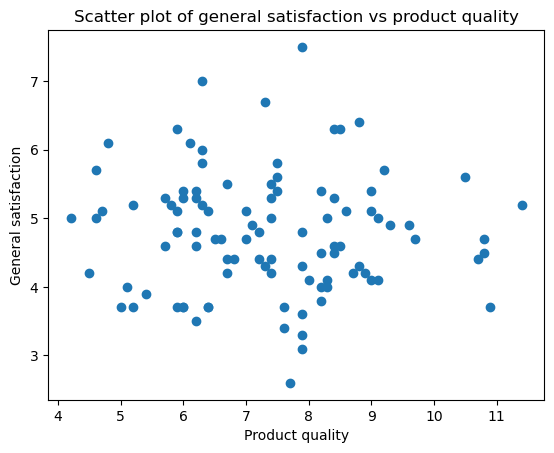

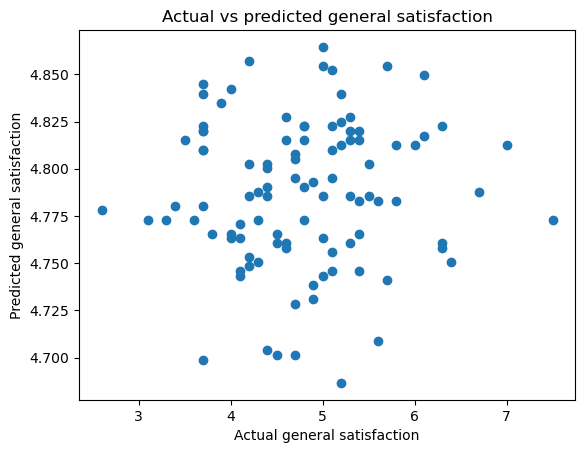

In [77]:
print("B)\n")
df = pd.read_csv('./data/AB0410_query.txt')

# extract the product quality and general satisfaction fields into separate arrays
X = df["product quality"].values.reshape(-1, 1)
y = df["general satisfaction"].values.reshape(-1, 1)

# fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# predict the general satisfaction values using the linear model
y_pred = model.predict(X)

# scatter plot of general satisfaction against product quality
plt.scatter(X, y)
plt.xlabel("Product quality")
plt.ylabel("General satisfaction")
plt.title("Scatter plot of general satisfaction vs product quality")
plt.show()

# scatter plot of actual and predicted general satisfaction values
plt.scatter(y, y_pred)
plt.xlabel("Actual general satisfaction")
plt.ylabel("Predicted general satisfaction")
plt.title("Actual vs predicted general satisfaction")
plt.show()

## Problem 4. Housing, part 1

The file **exrc_04/data/AB0410_houses.csv** has some fake data on sold houses.

The data is taken from [Kaggle](https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression) and randomized. The notebook is available in our public folder as well.

Prepare the data as in Section 1 of the Kaggle notebook: convert yes/no to 1/0, and add a dummy 1/0 variable to each of the furnishing status options.

Split the data to 60% train, 40% test, and and fit a linear model to the train data, predicting the test data. (No advanced stuff expected here; just the standard.)

Compare with a similar linear regression where only two explanatory variables is used. Plot real against predicted in both the above case (all the variables) and this case (two variables).

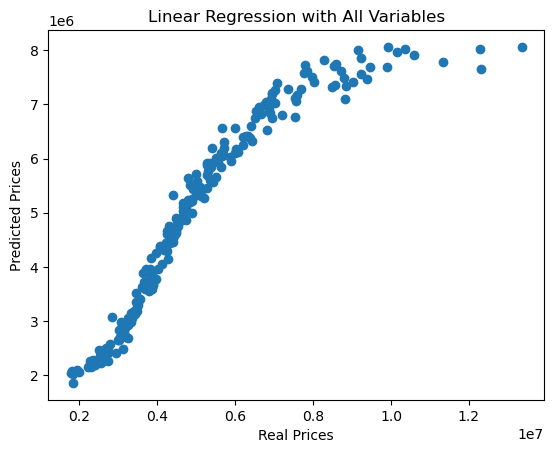

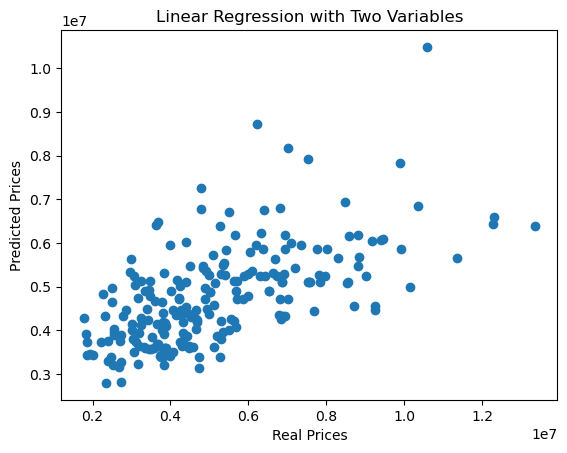

In [10]:
housing = pd.read_csv("./data/AB0410_houses.csv")

# define binary variables
binary_vars_list = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

# convert yes/no to 1/0
def binary_map(x):
    return x.map({"yes": 1, "no": 0})

housing[binary_vars_list] = housing[binary_vars_list].apply(binary_map)

# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(housing["furnishingstatus"], drop_first = True)
housing = pd.concat([housing, status], axis = 1)

# split data into training and testing sets (40% test size)
X = housing.drop(["price", "furnishingstatus"], axis=1)
y = housing["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit linear model to train data
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

# predict test data using all variables
y_pred_all = lr_all.predict(X_test)

# fit linear model with only two variables to train data
lr_two = LinearRegression()
lr_two.fit(X_train[["area", "bedrooms"]], y_train)

# predict test data with two variables
y_pred_two = lr_two.predict(X_test[["area", "bedrooms"]])

# plot real vs predicted prices for ALL variables
plt.scatter(y_test, y_pred_all)
plt.xlabel("Real prices")
plt.ylabel("Predicted prices")
plt.title("Linear regression with all variables")
plt.show()

# plot real vs predicted prices for only two variables
plt.scatter(y_test, y_pred_two)
plt.xlabel("Real prices")
plt.ylabel("Predicted prices")
plt.title("Linear regression with two variables")
plt.show()

## Problem 5. Housing, part 2

Study the Kaggle notebook mentioned in the previous notebook. In your own style and examples, please explain what is meant by

- Overfitting
- RFE
- K-fold CV.


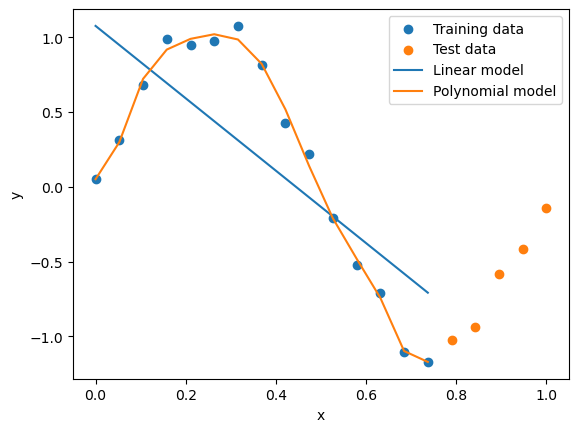

In [26]:
# overfitting means that the linear regression model has too many features or polynomial terms that make it fit perfectly to the training data but fail to predict accurately on new data.

#### example
# set random seed for reproducibility
np.random.seed(42)

# generate some data
x = np.linspace(0, 1, 20) # 20 points between 0 and 1
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, 20) # y = sin(2*pi*x) + noise

# split the data into training and test sets
x_train = x[:15] # first 15 points for training
y_train = y[:15]
x_test = x[15:] # last 5 points for testing
y_test = y[15:]

# fit a linear model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression() # create a linear regression object
linear_model.fit(x_train.reshape(-1, 1), y_train) # fit the model on the training data

# fit a polynomial model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=10), LinearRegression()) # create a pipeline that transforms x into polynomial features and then fits a linear regression object
poly_model.fit(x_train.reshape(-1, 1), y_train) # fit the model on the training data

# Plot the data and the models
plt.scatter(x_train, y_train, label="Training data") # plot the training data
plt.scatter(x_test, y_test, label="Test data") # plot the test data
plt.plot(x_train, linear_model.predict(x_train.reshape(-1, 1)), label="Linear model") # plot the linear model
plt.plot(x_train, poly_model.predict(x_train.reshape(-1, 1)), label="Polynomial model") # plot the polynomial
plt.legend() # show the legend
plt.xlabel("x") # label the x-axis 
plt.ylabel("y") # label the y-axis 
plt.show() # show the plot

In [18]:
# RFE is used to select the best features for linear regression

#### example
# create a synthetic dataset with 10 features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5)

# define the model
model = LogisticRegression()

# create the RFE object and rank each feature
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# print the ranking of each feature
print(rfe.ranking_)
print("This code creates a synthetic dataset with 10 features and uses RFE to select the best 5 features for logistic regression.\nIt prints the ranking of each feature, where 1 means selected and higher numbers mean eliminated.")

[1 1 1 4 3 2 1 1 6 5]
This code creates a synthetic dataset with 10 features and uses RFE to select the best 5 features for logistic regression.
It prints the ranking of each feature, where 1 means selected and higher numbers mean eliminated.


In [22]:
# K-fold CV stands for k-fold cross-validation. It is is used to compare different linear regression models and avoid overfitting.
# Overfitting is when a model learns too much from the training data and fails to generalize well on new data

#### example
X = [1, 2, 3, 4, 5]
kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    
print("This code splits the list X into 5 folds using KFold from scikit-learn. For each fold, it prints the indices of the training and test data.")

TRAIN: [1 2 3 4] TEST: [0]
TRAIN: [0 2 3 4] TEST: [1]
TRAIN: [0 1 3 4] TEST: [2]
TRAIN: [0 1 2 4] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
This code splits the list X into 5 folds using KFold from scikit-learn. For each fold, it prints the indices of the training and test data.


## Handin your final answers by running the code cell below.
- Save your latest changes first.
- Please remove anything that may identify you to your anonymous reviewer. See [this Teams message](https://teams.microsoft.com/l/message/19:wpZLQbHG775XujahAR4ScrnPZGiByh6yuWgewJCHXVQ1@thread.tacv2/1675678597453?tenantId=6e9eaaf0-3ff7-4de9-8cd4-1ffbd45951b9&groupId=ba0bbd60-8a1b-42b8-84ff-6de6a3c45ab6&parentMessageId=1675678597453&teamName=Data%20Analytics%20YAMK%2C%20Spring%202023&channelName=General&createdTime=1675678597453&allowXTenantAccess=false).
- You may run the code cell as many times as you wish.
- Your permission to write the handin file ends at the deadline.

In [78]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import handin_exrc_04
handin_exrc_04()


All the relevant .ipynb files in your current directory:

  1. exrc_04-Copy1.ipynb



Please input the order number (the one in the beginning of the line) of the file you want to hand in:  1



Your answers to the first exercises were handed in successfully. Thank you!
You may double check your handin by calling

    /home/varpha/data_analytics/bin/handin.sh

from the terminal prompt.
